Notes:\
River baseflow refers to the sustained, slow-moving component of streamflow in rivers and streams that comes from groundwater discharge into the watercourse. It's the flow that continues even when there's no recent precipitation, snowmelt, or storm runoff.\
Try comparing the previous month precipitaiton with currents observed to see if seepage helps?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df = pd.read_csv('RRCA_baseflow.csv')
df['Date'] = df['Date'] - 693963
df.head()


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,16769,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,16800,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,16828,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,16859,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,16889,144,1086190,14476800,8.23,29.63,0.0,3.728689


### Look at sample quantities for each segment

<Axes: xlabel='Irrigation_pumping', ylabel='Precipitation'>

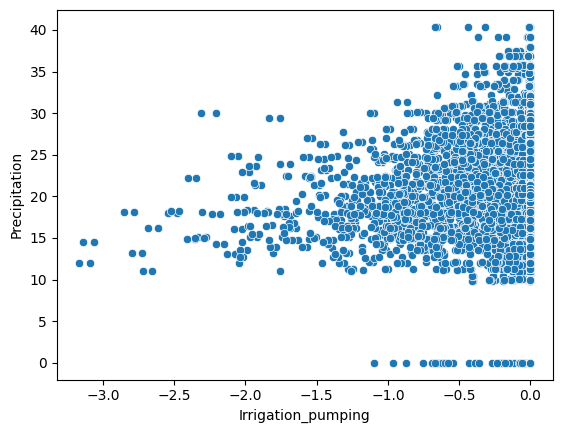

In [7]:
# evapo trans and seg id
plt.figure()
sns.scatterplot(data=df, x='Irrigation_pumping', y='Precipitation')

42


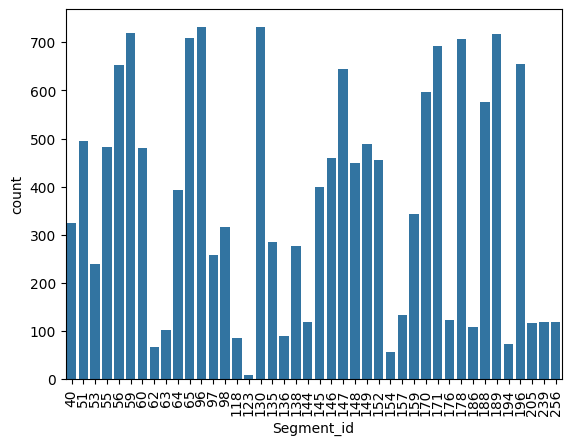

In [3]:
distinct_segment_ids = df['Segment_id'].nunique()
print(distinct_segment_ids)

plt.figure()
sns.countplot(data=df, x='Segment_id')
_,_ = plt.xticks(rotation=90) # remove the xticks from being printed

Consider looking at 59, 65, 96, 171, 178, 189, 196

Precipitation vs Observed


Intercept        18.203591
Precipitation     0.222491
dtype: float64

,0,1
Intercept,15.088297,21.318885
Precipitation,0.079840,0.365142


p-values


Intercept        4.726541e-26
Precipitation    2.329100e-03
dtype: float64

R-squared value: 0.026935959246614516


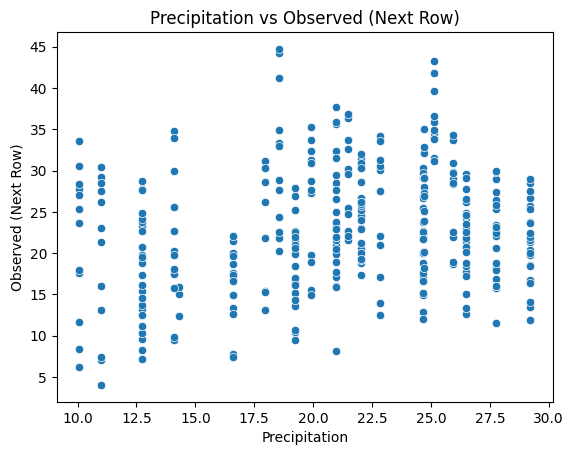

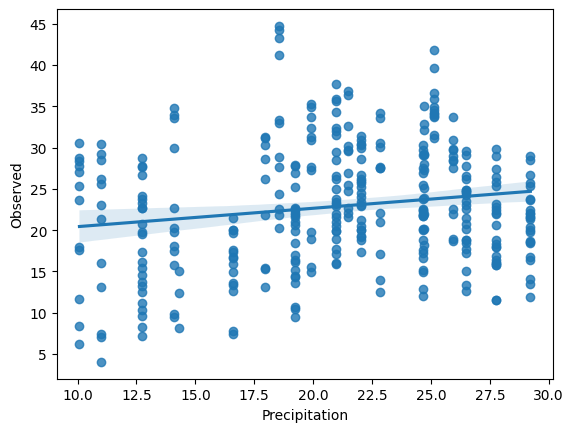

In [4]:
df_96 = df.loc[df['Segment_id'] == 159] # get the data for segment 96
df_96

plt.figure()
sns.scatterplot(data=df_96, x='Precipitation', y=df_96['Observed'].shift(-1))
plt.xlabel('Precipitation')
plt.ylabel('Observed (Next Row)')
plt.title('Precipitation vs Observed (Next Row)')

plt.figure()
sns.regplot(data=df_96, x='Precipitation', y='Observed')

print(f'Precipitation vs Observed')
lm = smf.ols(formula=f'Observed ~ Precipitation', data=df_96).fit()
display(lm.params)
display(lm.conf_int())
print('p-values')
display(lm.pvalues)
r_squared = lm.rsquared
print(f"R-squared value: {r_squared}")

Date vs Observed


Intercept    4.419804
Date         0.001040
dtype: float64

,0,1
Intercept,-1.781701,10.621309
Date,0.000694,0.001386


p-values


Intercept    1.618712e-01
Date         8.419893e-09
dtype: float64

R-squared value: 0.09309522881678944
---------------------------------
Evapotranspiration vs Observed


Intercept             26.907324
Evapotranspiration    -1.058064
dtype: float64

,0,1
Intercept,25.854925,27.959724
Evapotranspiration,-1.268553,-0.847574


p-values


Intercept             1.572599e-159
Evapotranspiration     1.988671e-20
dtype: float64

R-squared value: 0.22331692980459805
---------------------------------
Precipitation vs Observed


Intercept        18.203591
Precipitation     0.222491
dtype: float64

,0,1
Intercept,15.088297,21.318885
Precipitation,0.079840,0.365142


p-values


Intercept        4.726541e-26
Precipitation    2.329100e-03
dtype: float64

R-squared value: 0.026935959246614516
---------------------------------
Irrigation_pumping vs Observed


Intercept             23.327434
Irrigation_pumping    56.173035
dtype: float64

,0,1
Intercept,22.544572,24.110297
Irrigation_pumping,31.251650,81.094421


p-values


Intercept             8.454733e-180
Irrigation_pumping     1.252670e-05
dtype: float64

R-squared value: 0.0546533979962045
---------------------------------


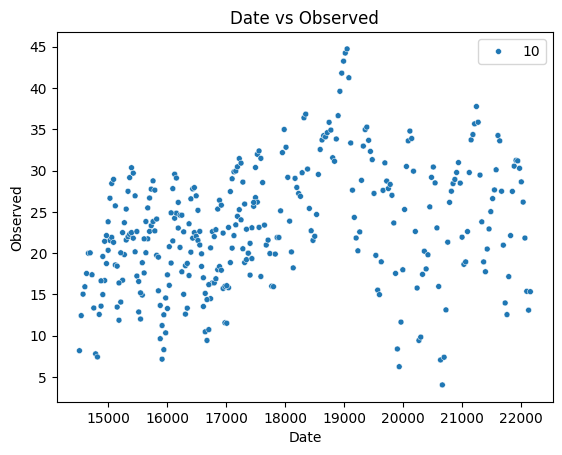

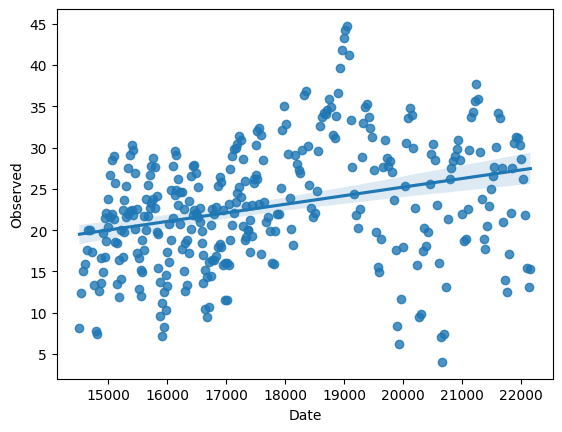

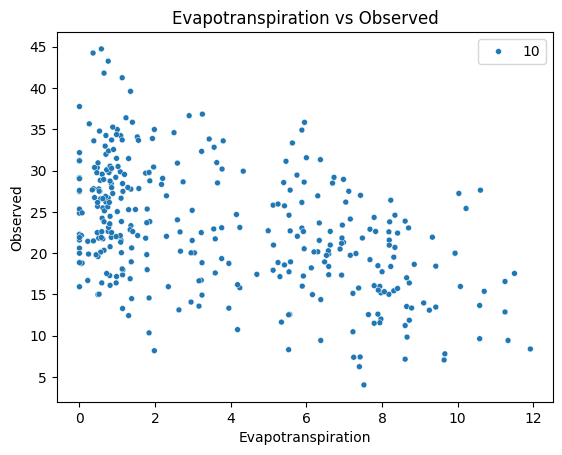

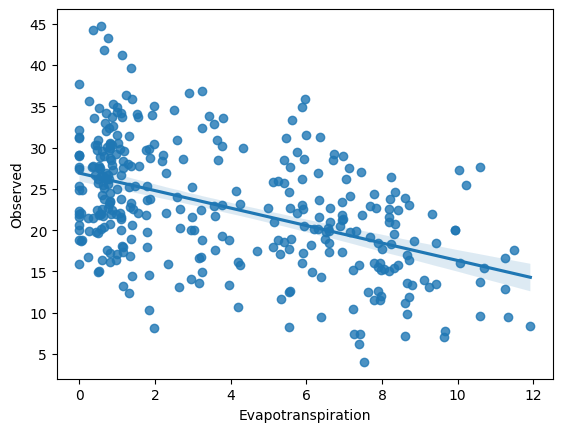

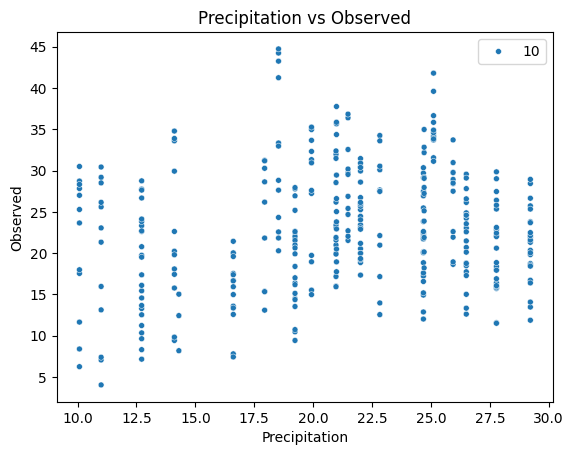

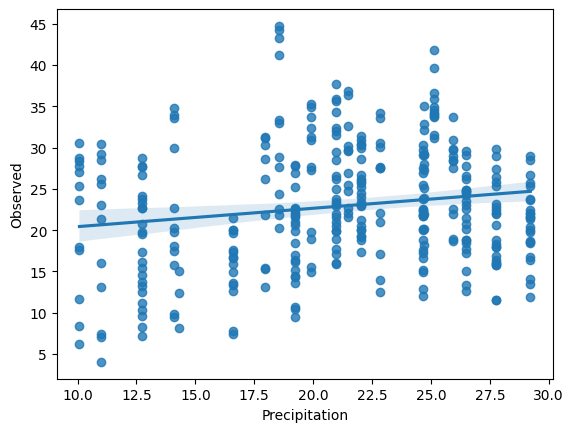

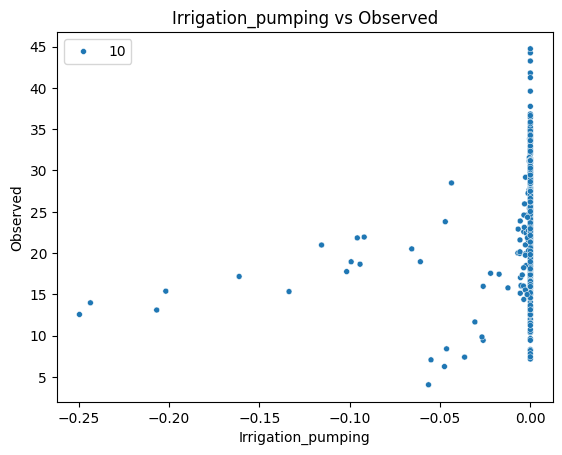

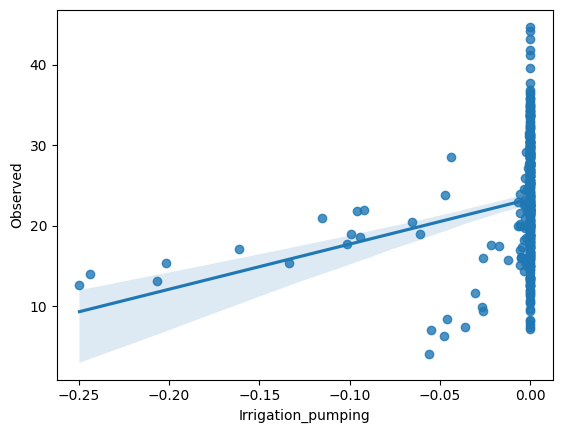

In [5]:
for column in df.columns:
    if column not in ['Observed', 'x', 'y', 'Segment_id']:
        plt.figure()
        sns.scatterplot(data=df_96, x=column, y='Observed', size=10)
        plt.xlabel(column)
        plt.ylabel('Observed')
        plt.title(f'{column} vs Observed')

        # do the p tests and regression line
        plt.figure()
        sns.regplot(data=df_96, x=column, y='Observed')

        print(f'{column} vs Observed')
        lm = smf.ols(formula=f'Observed ~ {column}', data=df_96).fit()
        display(lm.params)
        display(lm.conf_int())
        print('p-values')
        display(lm.pvalues)
        r_squared = lm.rsquared
        print(f"R-squared value: {r_squared}")
        print('---------------------------------')